In [1]:
library(tidyverse)
library(glmnet)
tbl1 = read_csv("final_project_data.csv")
tbl2 = read_csv("bret-1.csv")
tbl = cbind(tbl1, tbl2)


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-3

New names:
* `` -> ...1

Rows: 524160 Columns: 4

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl (4): ...1, Asset_1, Asset_2, Asset_3


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to qu

In [4]:
install.packages("unix")

Installing package into 'C:/Users/Ben/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

Warning message:
"package 'unix' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [2]:
tbl$min10 = pmin((tbl$...1 + 10), nrow(tbl))
tbl$rf10 = (tbl$Asset_1[tbl$min10] - tbl$Asset_1)/tbl$Asset_1
tbl$max3 = pmax((tbl$...1 - 3), 1)
tbl$rb3 = (tbl$Asset_1 - tbl$Asset_1[tbl$max3])/tbl$Asset_1[tbl$max3]
tbl$max10 = pmax((tbl$...1 - 10), 1)
tbl$rb10 = (tbl$Asset_1 - tbl$Asset_1[tbl$max10])/tbl$Asset_1[tbl$max10]
tbl$max30 = pmax((tbl$...1 - 30), 1)
tbl$rb30 = (tbl$Asset_1 - tbl$Asset_1[tbl$max30])/tbl$Asset_1[tbl$max30]
tbl$max60 = pmax((tbl$...1 - 60), 1)
tbl$rb60 = (tbl$Asset_1 - tbl$Asset_1[tbl$max60])/tbl$Asset_1[tbl$max60]
tbl$max120 = pmax((tbl$...1 - 120), 1)
tbl$rb120 = (tbl$Asset_1 - tbl$Asset_1[tbl$max120])/tbl$Asset_1[tbl$max120]
tbl$max180 = pmax((tbl$...1 - 180), 1)
tbl$rb180 = (tbl$Asset_1 - tbl$Asset_1[tbl$max180])/tbl$Asset_1[tbl$max180]
tbl$max240 = pmax((tbl$...1 - 240), 1)
tbl$rb240 = (tbl$Asset_1 - tbl$Asset_1[tbl$max240])/tbl$Asset_1[tbl$max240]
tbl$max360 = pmax((tbl$...1 - 360), 1)
tbl$rb360 = (tbl$Asset_1 - tbl$Asset_1[tbl$max360])/tbl$Asset_1[tbl$max360]
tbl$max480 = pmax((tbl$...1 - 480), 1)
tbl$rb480 = (tbl$Asset_1 - tbl$Asset_1[tbl$max480])/tbl$Asset_1[tbl$max480]
tbl$max600 = pmax((tbl$...1 - 600), 1)
tbl$rb600 = (tbl$Asset_1 - tbl$Asset_1[tbl$max600])/tbl$Asset_1[tbl$max600]
tbl$max720 = pmax((tbl$...1 - 720), 1)
tbl$rb720 = (tbl$Asset_1 - tbl$Asset_1[tbl$max720])/tbl$Asset_1[tbl$max720]
tbl$max960 = pmax((tbl$...1 - 960), 1)
tbl$rb960 = (tbl$Asset_1 - tbl$Asset_1[tbl$max960])/tbl$Asset_1[tbl$max960]
tbl$max1200 = pmax((tbl$...1 - 1200), 1)
tbl$rb1200 = (tbl$Asset_1 - tbl$Asset_1[tbl$max1200])/tbl$Asset_1[tbl$max1200]
tbl$max1440 = pmax((tbl$...1 - 1440), 1)
tbl$rb1440 = (tbl$Asset_1 - tbl$Asset_1[tbl$max1440])/tbl$Asset_1[tbl$max1440]
#creating all the backwards returns and forward returns

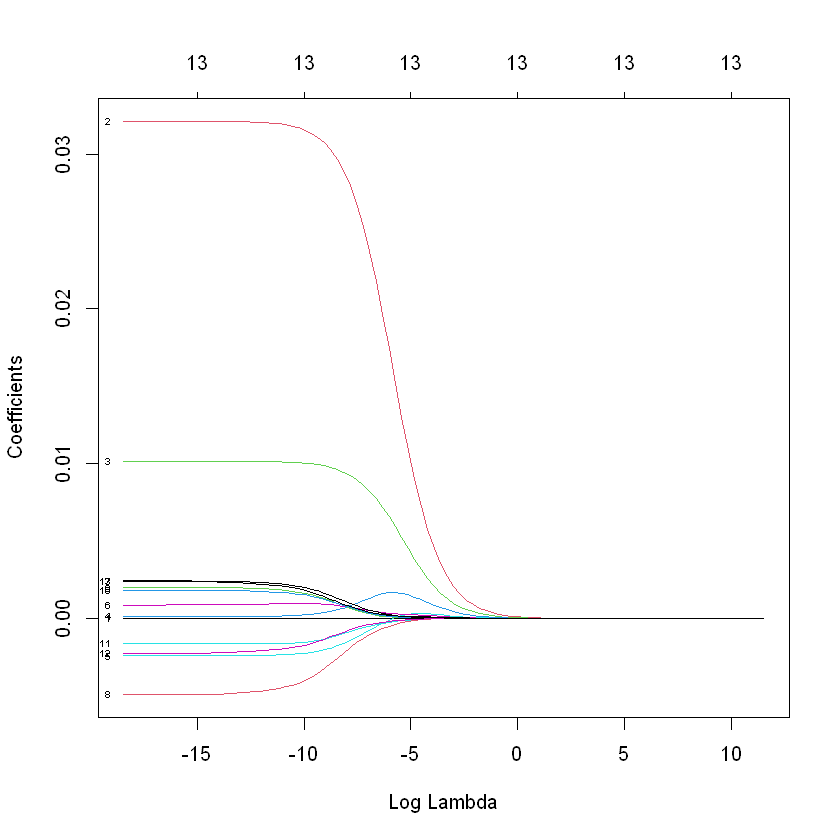

In [57]:
cutoff = floor(nrow(tbl)*.7)
train_id = 2:cutoff
train = tbl[2:cutoff,]
test = tbl[(cutoff+1):nrow(tbl),]
#splitting data
Y = tbl$rf10
X = model.matrix(rf10 ~ rb3 + rb10 + rb30 + rb60 + rb120 + rb240 + rb360 + rb480 + rb600 + rb720 + rb960 + rb1200 + rb1440, tbl)[,-1]
grid = 10^seq(5, -8, length=100)
ridge.mod = glmnet(X[train_id,], Y[train_id], alpha=0, lambda=grid)
plot(ridge.mod, xvar = "lambda", label = TRUE)
#ridge regression, coefficients vs log of potential lambda

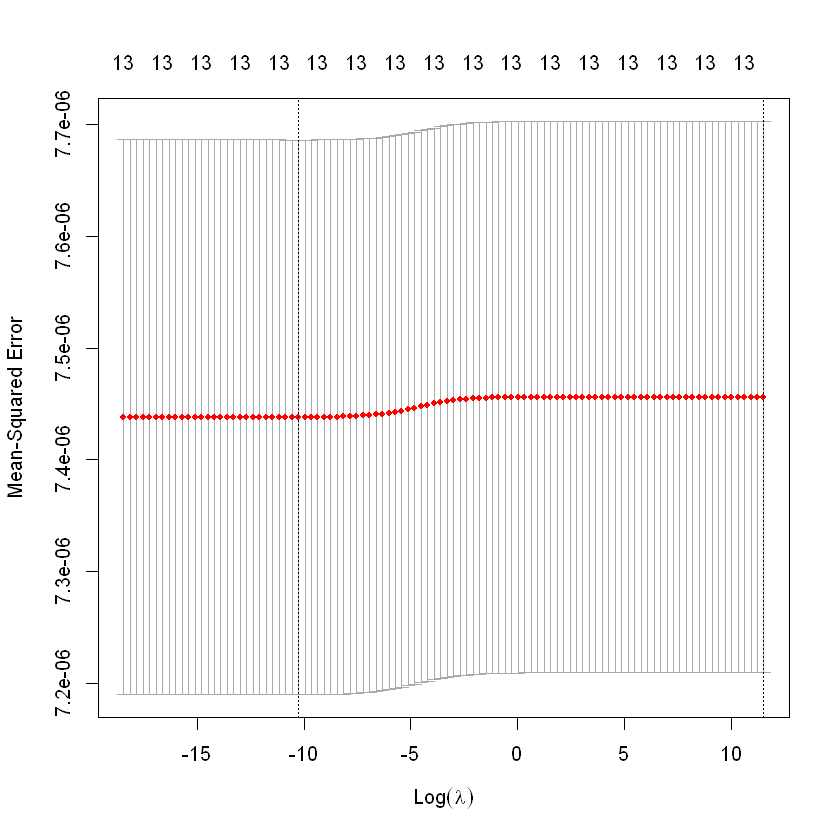

In [74]:
set.seed(1)
cv.out = cv.glmnet(X[train_id,], Y[train_id], alpha=0, lambda = grid)
plot(cv.out)
# plot of cv mse by lambda

In [75]:
bestlam = cv.out$lambda.min
ridge.pred_test = predict(ridge.mod, newx=X[-train_id,])
which.min(apply(ridge.pred_test, 2, function (x) mean((x - Y[-train_id])^2)))
# findng which lambda has the lowest validation mse by index

s54 
 55

In [76]:
(bestlam = grid[55])
# finding optimal lambda

[1] 0.008111308

In [77]:
ridge.pred_train = predict(ridge.mod,s = bestlam, newx=X[train_id,])
ridge.pred_test = predict(ridge.mod,s = bestlam, newx=X[-train_id,])
c(cor(Y[train_id], ridge.pred_train), cor(Y[-train_id], ridge.pred_test))
#in sample and out sample correlation

[1] 0.04622946 0.01295758

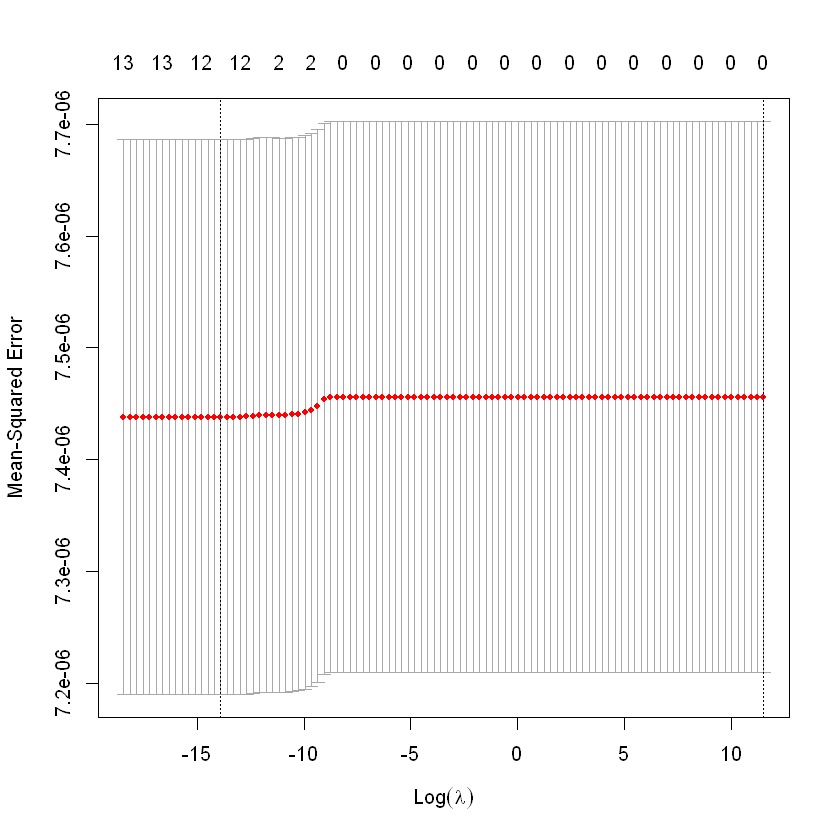

In [68]:
lasso.mod = glmnet(X[train_id,], Y[train_id], alpha=1, lambda=grid)
set.seed(1)
cv.out = cv.glmnet(X[train_id,], Y[train_id], alpha=1, lambda = grid)
plot(cv.out)
#lasso model and cv plot

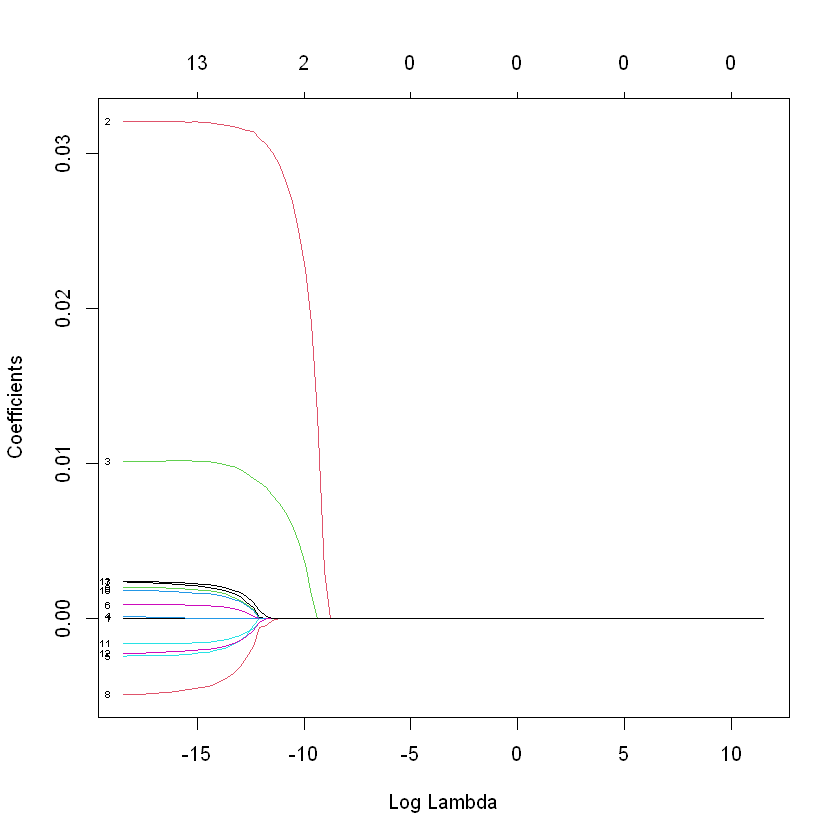

In [70]:
plot(lasso.mod, xvar = "lambda", label = TRUE)
# lasso coefficients vs lambda plot

In [71]:

lasso.pred_test = predict(lasso.mod, newx=X[-train_id,])
which.min(apply(lasso.pred_test, 2, function (x) mean((x - Y[-train_id])^2)))
# index of lambda w lowest mse

s70 
 71

In [72]:
(bestlam = grid[71])
#lambda with lowest mse

[1] 6.428073e-05

In [73]:
lasso.pred_train = predict(lasso.mod,s = bestlam, newx=X[train_id,])
lasso.pred_test = predict(lasso.mod,s = bestlam, newx=X[-train_id,])
c(cor(Y[train_id], lasso.pred_train), cor(Y[-train_id], lasso.pred_test))
# in sample and out sample correlation

[1] 0.04769425 0.02032840